<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/02_neural_network_classifiaction_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indtroduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where we try to classify something as one thing or another
* Binary Classificaiton
* MutliClass Classification
* Mutlilabel Classification

## Creating data to View and Fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now... let's visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


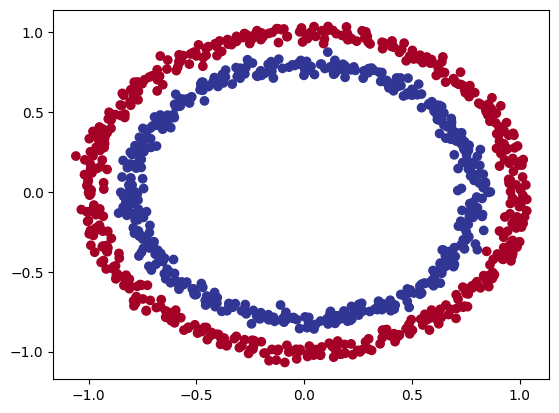

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

⚒️ Exercise: play and spend around 10 minutes on [playground_TensorFlow](https://playground.tensorflow.org)

## Input and Output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
import tensorflow as tf

# . Set the random seed
tf.random.set_seed(42);

# 1. Compile the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"] # out of 100 how many our model got right, what percentage %, very simple
                )

# 3. Fit the model
model_1.fit(X, y, epochs=5)




Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 5.2405 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.6668 - accuracy: 0.4660
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.2870 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8107 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.4930


In [11]:
# let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)


In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're  working on binary classificaition problem and our model is getting around - 50% accuracy... it's performing as it is guessing.

So, let's step things up a notch and add an extra layer.

In [13]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939600110054016, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model:

1. Create a model - we might want to add more layers or increase
2. Compiling a model - we might want to use different optimizimer function
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)


In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)



In [17]:
# 4. Evalute the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5140


[0.6964501738548279, 0.5139999985694885]

🔑 Note: Whenever your model is performing strangely or there's something going on with your data, you'renot quite sure of rememeber these  three words:
**Visualize, Visualize, Visualize**.
Inspect your data, your model, inspect your model's predictions

To visualize our model's predictions let's create a function `plot_decision_boundary()`, this function will

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrids
* Plot the predictions as well as line between zones(where each unique class falls)

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  This function was inspired by two resources
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                       np.linspace(y_min, y_max, 100))
  # print("xx: ",xx)
  # print("yy:", yy)

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together
  # print("x_in: ", x_in)

  # Make predictions
  y_pred = model.predict(x_in)
  # print("y_pred: ", y_pred)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



3125/3125 [==============================] - 4s 1ms/step
doing binary classification


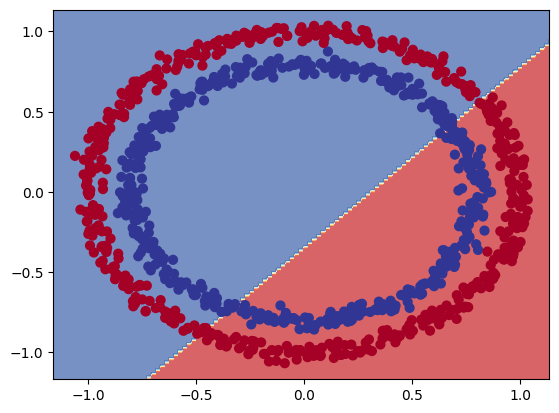

In [19]:
plot_decision_boundary(model=model_3,
                       X = X,
                       y = y )

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data inot training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compile our model for a binary classification
problem.

But... we're now working on a regression problem, let's change the model to suit our data.


In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 564.3308 - mae: 564.3308
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 433.7385 - mae: 433.7385
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 310.7446 - mae: 310.7446
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 184.9423 - mae: 184.9423
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 65.2782 - mae: 65.2782
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 83.4606 - mae: 83.4606
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 89.5204 - mae: 89.5204
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 55.5758 - mae: 55.5758
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.1035 - mae: 49.1035
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 50.2617 - mae: 50.2617
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 8ms/step


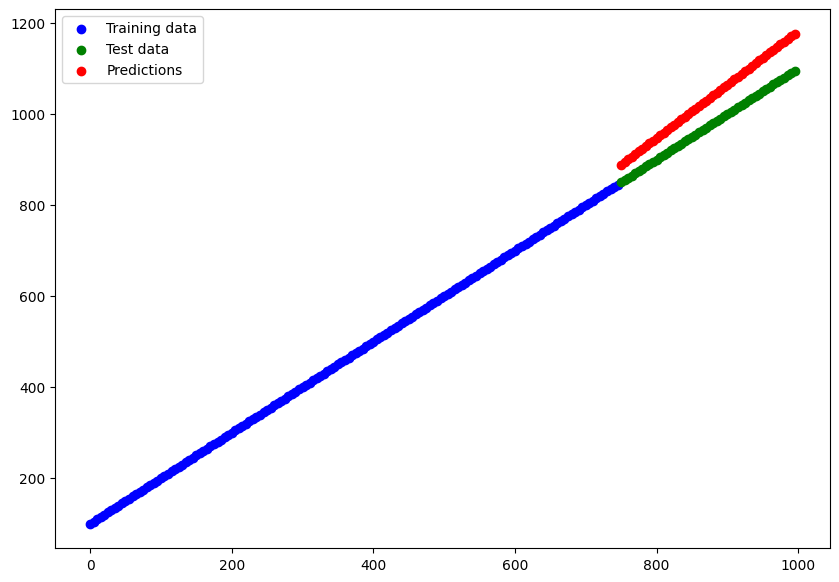

In [22]:
# Make prediciton with our training data
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediciton against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3268 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2264 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1602 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0848 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9547 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8692 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8343 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7688 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7067 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5382 - accuracy: 0.5000
Epoch 11/

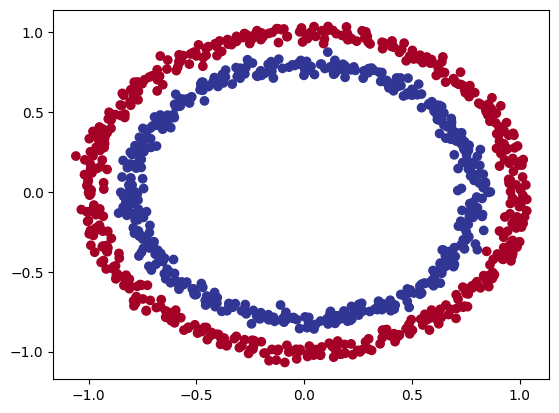

In [24]:
# Check out our data
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

3125/3125 [==============================] - 9s 3ms/step
doing binary classification


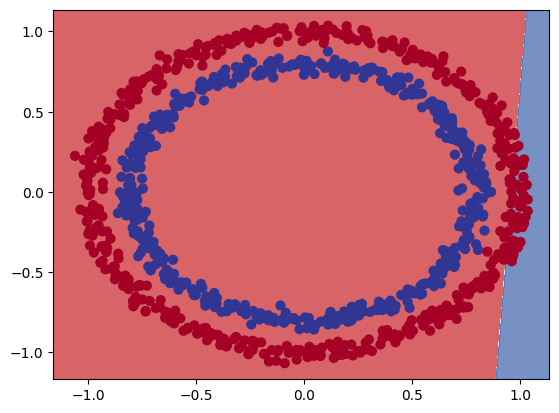

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0758 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0772 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0764 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0759 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0754 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0663 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0553 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0439 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0417 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0406 - accuracy: 0.4850
Epoch 11/

In [27]:
# TIme to replicate the multi-layer neural network from TensorFlow playground in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # we want our output to be red or blue 2 option not 4 option, so we need ot add extra like below
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.0394 - accuracy: 0.4250
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.3580
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.3700
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8345 - accuracy: 0.3990
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.4020
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8044 - accuracy: 0.4020
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7922 - accuracy: 0.4080
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7832 - accuracy: 0.4130
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7744 - accuracy: 0.4100
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7670 - accuracy: 0.4170
Epoch 11/

In [28]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8520


[0.395101934671402, 0.8519999980926514]

3125/3125 [==============================] - 5s 2ms/step
doing binary classification


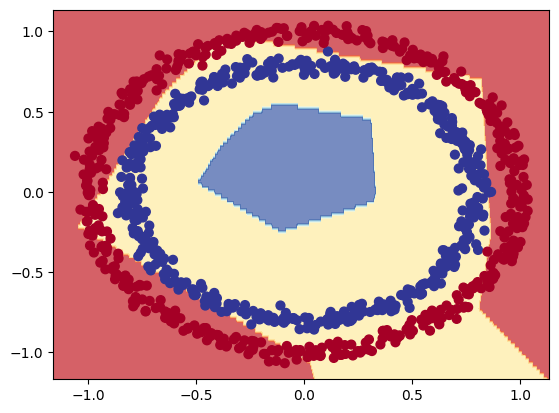

In [29]:
# How do our model prediction look?
plot_decision_boundary(model_6, X, y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # input activation = relu
    tf.keras.layers.Dense(4, activation="relu"), # input activation = relu
    tf.keras.layers.Dense(1, activation= "sigmoid") # for output activation we use sigmoid for binary classification
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7458 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5110
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5170
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5260
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5340
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5350
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5410
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5410
Epoch 11/

In [31]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9960


[0.13809730112552643, 0.9959999918937683]

3125/3125 [==============================] - 4s 1ms/step
doing binary classification


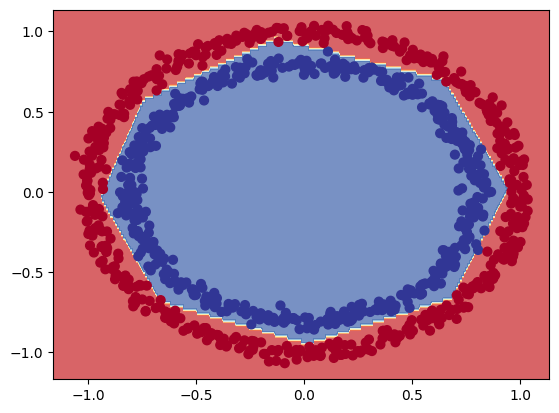

In [32]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what did we predict on?

🔑 **Note** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions(or lines),let's see them in aciton.

In [33]:
# Create a toy tensor (similar to the data we passed into our model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

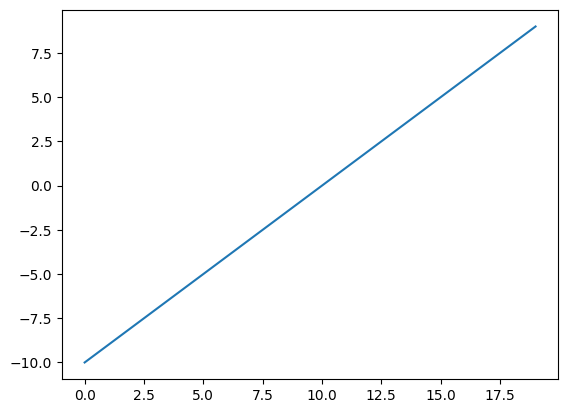

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid funciton on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

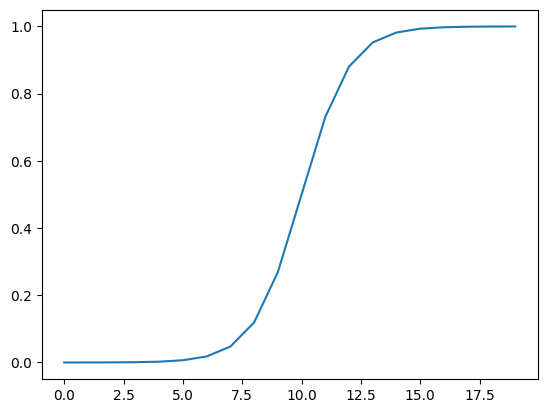

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

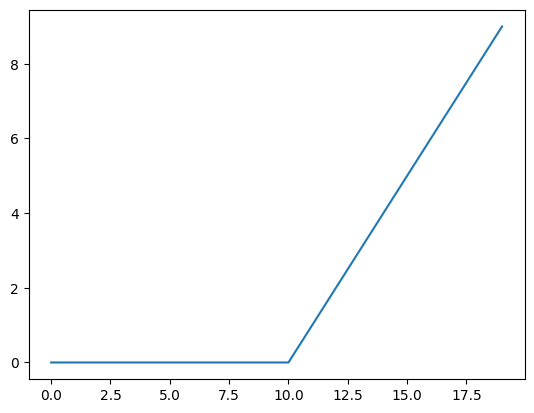

In [38]:
# Plot RELU-modified tensor
plt.plot(relu(A))

In [39]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

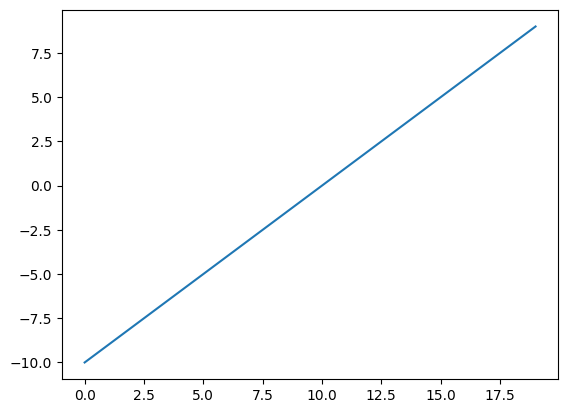

In [40]:
# Does the linear activation function change anything ?
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Does A even changes after linear activations?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So, far we've been training and testing on the same dataset

However, in machine learning this is basically a sin.

So, let's create a training and test set.

In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's reacreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
                )

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4775
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5038
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5163
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5275
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5138
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5312
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5300
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5575
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5387
Epoch 11/25
25/25 [

In [45]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9750


[0.1816936731338501, 0.9750000238418579]

3125/3125 [==============================] - 4s 1ms/step
doing binary classification
3125/3125 [==============================] - 4s 1ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

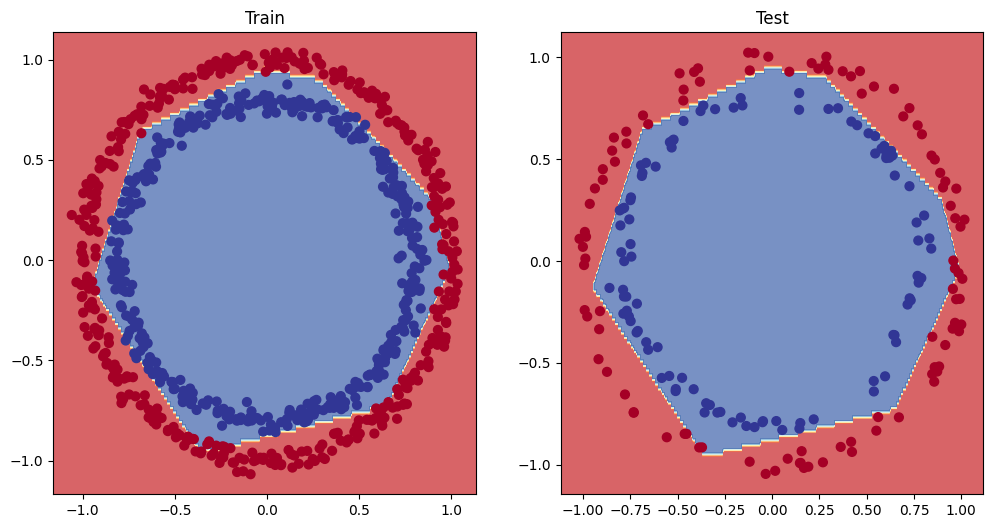

In [46]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show

## Plot the loss (or training ) curve

In [48]:
history.history

{'loss': [0.6959146857261658,
  0.6923443078994751,
  0.6905422210693359,
  0.6881850361824036,
  0.6872422099113464,
  0.6852409839630127,
  0.6813763976097107,
  0.6798959970474243,
  0.677623987197876,
  0.6725578308105469,
  0.6677660942077637,
  0.6435021758079529,
  0.6341434717178345,
  0.6119287014007568,
  0.587619423866272,
  0.5184778571128845,
  0.44899365305900574,
  0.3988043963909149,
  0.34716907143592834,
  0.30818361043930054,
  0.2703014016151428,
  0.24076105654239655,
  0.21944929659366608,
  0.2040838748216629,
  0.19595955312252045],
 'accuracy': [0.49125000834465027,
  0.47749999165534973,
  0.5037500262260437,
  0.5162500143051147,
  0.5274999737739563,
  0.5137500166893005,
  0.53125,
  0.5299999713897705,
  0.5575000047683716,
  0.5387499928474426,
  0.5525000095367432,
  0.6337500214576721,
  0.612500011920929,
  0.65625,
  0.6787499785423279,
  0.7912499904632568,
  0.862500011920929,
  0.8812500238418579,
  0.9325000047683716,
  0.925000011920929,
  0.9549

In [50]:
# Convet the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.695915,0.49125
1,0.692344,0.47750
2,0.690542,0.50375
3,0.688185,0.51625
4,0.687242,0.52750
5,0.685241,0.51375
6,0.681376,0.53125
7,0.679896,0.53000
8,0.677624,0.55750
9,0.672558,0.53875


Text(0.5, 1.0, 'Model_8 loss curves')

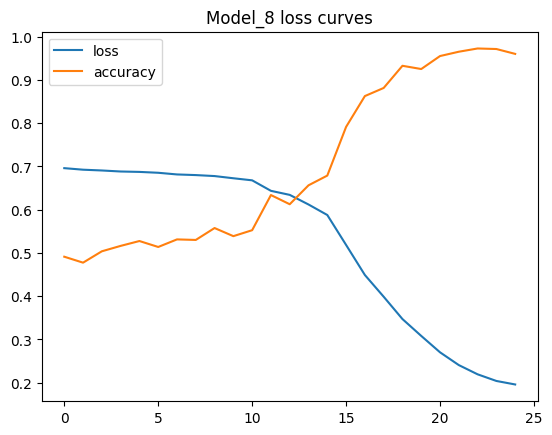

In [51]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find ideal learning rate (the learning rate where the loss decrease the most during training) we're goin to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to you model *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curve plot.

In [52]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate callback
# means to traverse set of learning rate value starting from 1e-4 and increasing by 10^(epoch/20) every time. 1e-4 coincide with value 10^-4
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks=[lr_scheduler])




Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7073 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

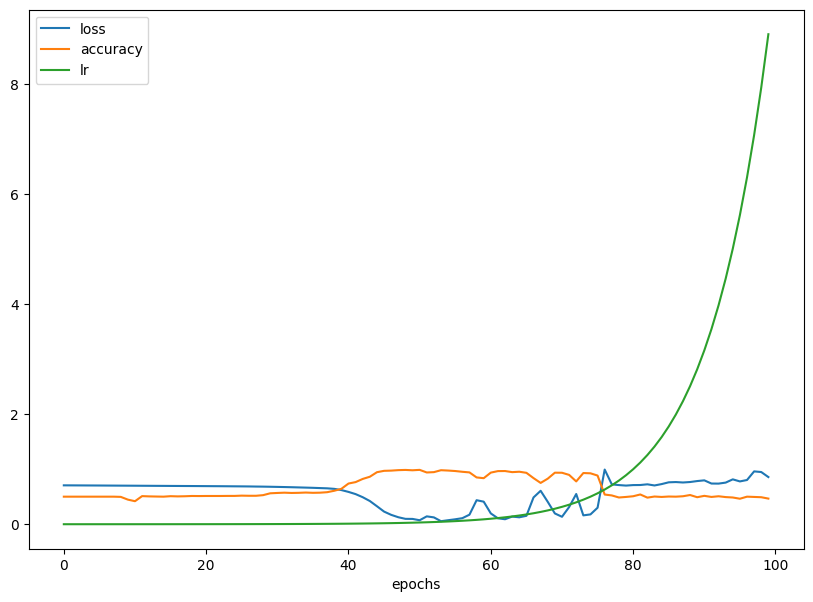

In [53]:
# Checkout history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

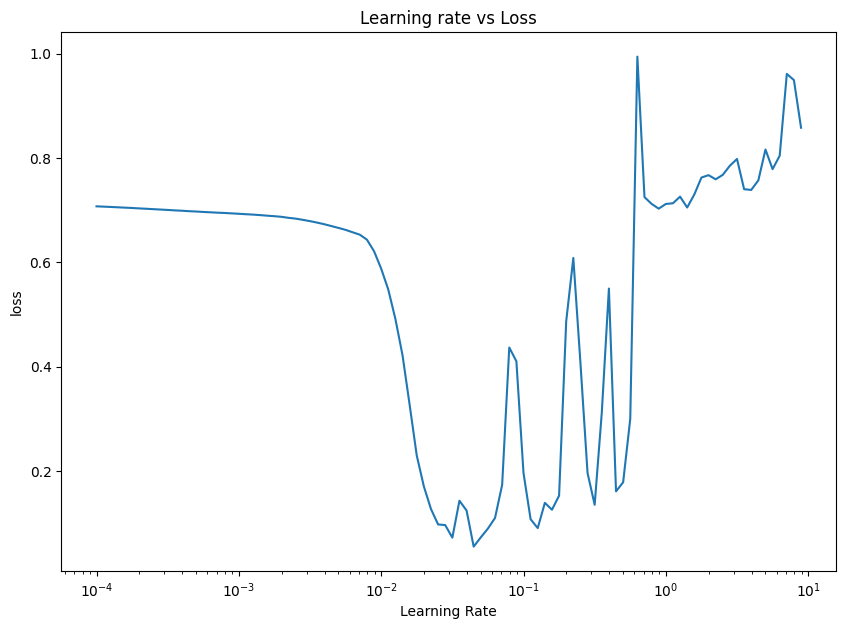

In [54]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) #semilogx means we want logarithm of x-value in x axis
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")

In [55]:
# Example of other typical learning rate values:
10**0, 10**-2, 10**-3, 1e-4

(1, 0.01, 0.001, 0.0001)

In [56]:
# Let's try using a higher *ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)


# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5238
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6875
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.6988
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.6950
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7812
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8500
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.9275
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9787
Epoch 11/20
25/25 [

In [57]:
# Evalute model 10 with the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9650


[0.09603685140609741, 0.9649999737739563]

In [58]:
# Evaluate model 8 on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9750


[0.1816936731338501, 0.9750000238418579]

3125/3125 [==============================] - 4s 1ms/step
doing binary classification
3125/3125 [==============================] - 4s 1ms/step
doing binary classification


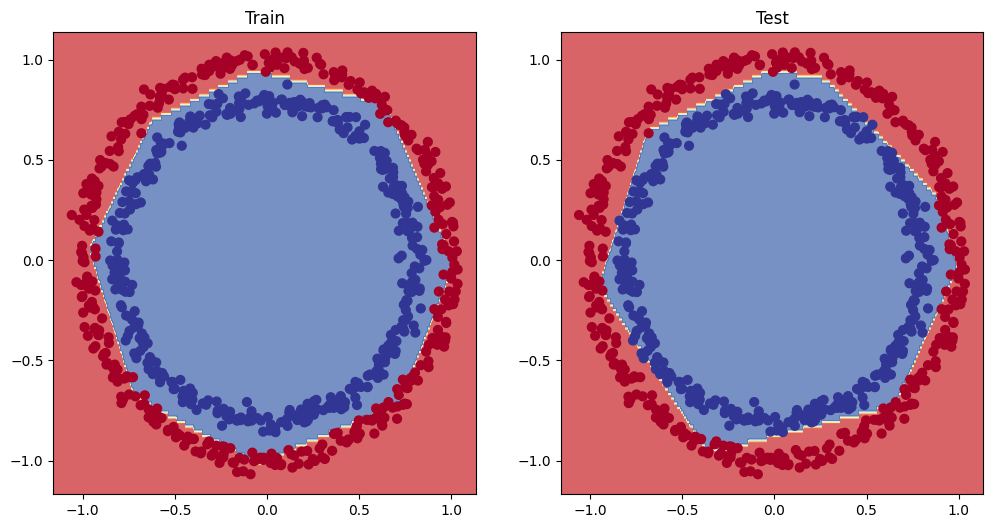

In [59]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.show()

## Moer classification evaluation methods

Alongside  visualizing our models results as much as possible, there are a handful of other classificaion and evaluation metrics, we should be familiar with
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [60]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:  {loss}")
print(f"Model accuracy on the test set:  {(accuracy * 100):.2f} %")

7/7 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9650
Model loss on the test set:  0.09603685140609741
Model accuracy on the test set:  96.50 %


How about a confusion matrix

In [61]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [63]:
y_preds[:10]

array([[0.9675514 ],
       [0.9675514 ],
       [0.9675514 ],
       [0.9675514 ],
       [0.451191  ],
       [0.02429541],
       [0.9675514 ],
       [0.00121847],
       [0.9675514 ],
       [0.03756047]], dtype=float32)

Oops... looks like our predictions array has come out in
**prediction probability** form.. the standard output from the sigmoid(or softmax) activation function

In [64]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [65]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[94,  7],
       [ 0, 99]])

How about we prettify our confusion matrix?

In [80]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

def plot_confusion_matrix (y_test, y_preds):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it


  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  # setting labels 0 t0 1, as shape[0] is 2

  # Labels the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the labels size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for direction colors
  threshold = (cm.max() + cm.min()) /2.  # give different shades of color respective to how many values are in each box , darker for more value

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15
            )

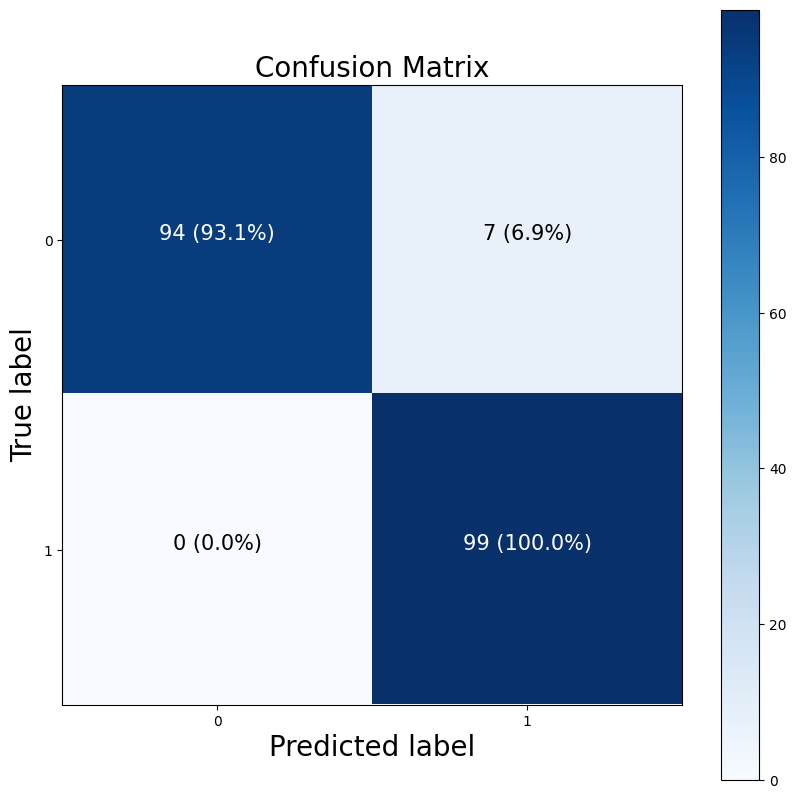

In [82]:
plot_confusion_matrix(y_test = y_test, y_preds = y_preds)

# Working with a larger example (multiclass classification)
  * This means if you have 3 different classes, it's multiclass classification.
  * It's also means if you have 100 different classes, it's multiclass
  classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [151]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [84]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [85]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [162]:
print(len(test_data), len(test_labels))

10000 10000


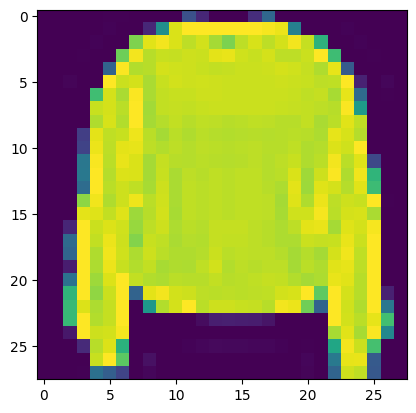

In [89]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [90]:
# Check out sample label
train_labels[7]

2

In [91]:
# Create a small list so we can index into our training labels so they're human-readable
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

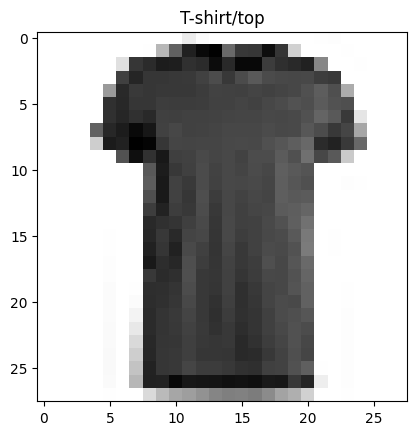

In [93]:
# Plot an example image and it's label
# imp: here images are grayscaled so we dont need to look at many to get familiar ourself but for unkown colorfull images we ourself should look at amu
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary) # colormap = binary for grayscale
plt.title(class_names[train_labels[index_of_choice]])

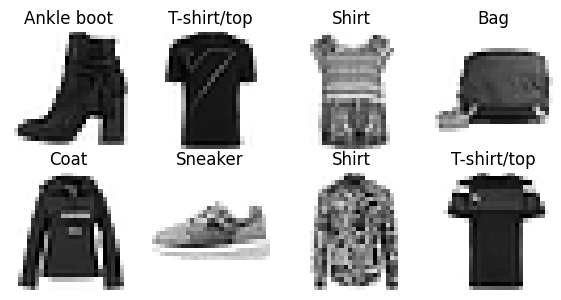

In [119]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range (8):
  ax=plt.subplot(4,4,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're goin to have to tweak a few things:
* Input shpae = 28 X 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy().
  * If your labels are in integer form use SparseCategoricalCrossentropy().
* Output layer acitivation = Softmax (not sigmoid)

In [127]:
# Our data needs to be flattened ( from 28*28 to None,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))]) # neural network want everything to be one long vector
flatten_model.output_shape

(None, 784)

In [128]:
28 * 28

784

In [130]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [133]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [132]:
# If we haven't one hot encoded labels

# Set random seed
tf.random.set_seed(42)

#  Create the model
model_11_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # data needs to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # 10 because of 10 class_names or classes
])

# Compile the model
model_11_1.compile(# loss=tf.keras.losses.CategoricalCrossentropy(), # if we want to use CategoricalCrossentropy() we need to provide labels as one hot encoding
                # otherwise we need to use SparseCategoricalCrossentropy loss, if we ant to provide labels as it is as integers
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

# Fit the model
non_norm_history = model_11_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels) # model can evaluate the patterns at the time of fitting with this validation data. Model tries to find pattern  from train_data, and train_labels when it is fitting. We dont have dedicated validation set but we can use test_data
                                )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6176 - accuracy: 0.1261 - val_loss: 2.1734 - val_accuracy: 0.1542
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1634 - accuracy: 0.1602 - val_loss: 2.1610 - val_accuracy: 0.1971
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0605 - accuracy: 0.1890 - val_loss: 2.0963 - val_accuracy: 0.1768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8919 - accuracy: 0.2169 - val_loss: 1.7596 - val_accuracy: 0.2619
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7487 - accuracy: 0.2363 - val_loss: 1.7046 - val_accuracy: 0.2430
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6847 - accuracy: 0.2704 - val_loss: 1.6621 - val_accuracy: 0.2933
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6308 - accuracy: 0.3016 - val_loss: 1.6358 - val_accuracy:

In [137]:
# If we haven one hot encoded labels

# Set random seed
tf.random.set_seed(42)

#  Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # data needs to be flattened
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # 10 because of 10 class_names or classes
])

# Compile the model
model_11.compile(
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)) # model can evaluate the patterns at the time of fitting with this validation data. Model tries to find pattern  from train_data, and train_labels when it is fitting. We dont have dedicated validation set but we can use test_data
                                )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5041 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3031 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [136]:
# Check the model summary
model_11.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor they try to find the patterns in 0 & 1.

In [163]:
# We can get our training and testing data between 0 an 1 by dividing by maximum
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [165]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5366 - accuracy: 0.3947 - val_loss: 1.2846 - val_accuracy: 0.4833
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1989 - accuracy: 0.5173 - val_loss: 1.1397 - val_accuracy: 0.5329
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9011 - accuracy: 0.6484 - val_loss: 0.8236 - val_accuracy: 0.6537
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7763 - accuracy: 0.7001 - val_loss: 0.7683 - val_accuracy: 0.7112
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7238 - accuracy: 0.7408 - val_loss: 0.7147 - val_accuracy: 0.7601
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6767 - accuracy: 0.7657 - val_loss: 0.6926 - val_accuracy: 0.7656
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6407 - accuracy: 0.7763 - val_loss: 0.6708 - val_accuracy:

🔑**Note:** Neural networks tend to perfer data in numerical form as well as scaled/normalized(numbers between 0 and 1)

<Axes: title={'center': 'Normalized data'}>

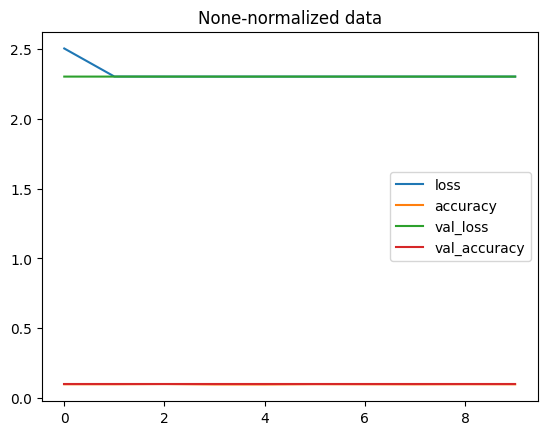

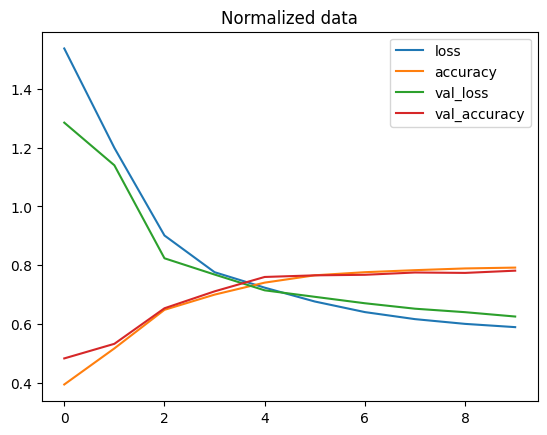

In [167]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="None-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when we're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecure but different data or same data but different architecture). Meaning don't change 10 things at a time, just a little change.

## Finding the ideal learning rate

In [168]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler]
                               )

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4570 - accuracy: 0.4130 - val_loss: 1.2559 - val_accuracy: 0.4755 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1355 - accuracy: 0.5219 - val_loss: 1.0869 - val_accuracy: 0.5315 - lr: 0.0013
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0239 - accuracy: 0.5766 - val_loss: 1.0063 - val_accuracy: 0.6136 - lr: 0.0016
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9168 - accuracy: 0.6534 - val_loss: 0.8833 - val_accuracy: 0.6494 - lr: 0.0020
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8302 - accuracy: 0.6746 - val_loss: 0.8102 - val_accuracy: 0.6843 - lr: 0.0025
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7544 - accuracy: 0.7282 - val_loss: 0.7709 - val_accuracy: 0.7307 - lr: 0.0032
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

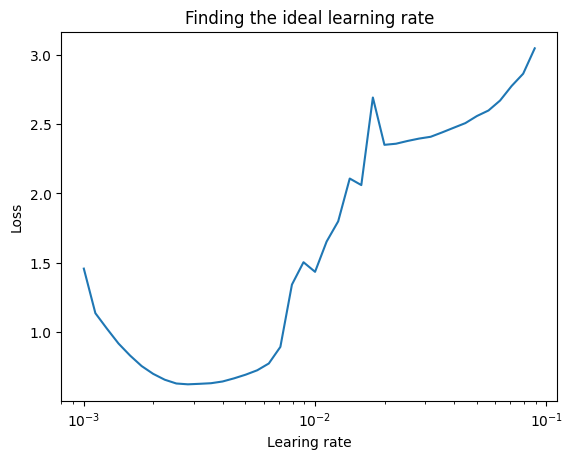

In [169]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20) )

plt.semilogx(lrs, find_lr_history.history["loss"])

plt.xlabel("Learing rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

look at the figure above and  lowest is between 10-3 and 10-2 , we need to go back 10 times to where loss is falling sharply. **So use 10^-3 which is also the default learning rate of Adam()**

In [172]:
# Let's refit a model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"]
                 )

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9230 - accuracy: 0.6626 - val_loss: 0.7053 - val_accuracy: 0.7520
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6505 - accuracy: 0.7648 - val_loss: 0.6579 - val_accuracy: 0.7662
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6110 - accuracy: 0.7760 - val_loss: 0.6483 - val_accuracy: 0.7670
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5898 - accuracy: 0.7864 - val_loss: 0.6121 - val_accuracy: 0.7888
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5711 - accuracy: 0.7952 - val_loss: 0.6189 - val_accuracy: 0.7826
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5559 - accuracy: 0.8024 - val_loss: 0.5854 - val_accuracy: 0.7983
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5425 - accuracy: 0.8080 - val_loss: 0.6056 - val_accurac

## Evaluating our multi-class classification model

To evaluate our multi-class  classification model we could:
* Evaluate it's performance using other classificaiton metrics (such as a confusion matrix)
* Assess some of it's predictions (through visualizations)
* Improve its result ( training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2

In [195]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettify it


  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


# Set labels to the classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])  # setting labels 0 t0 1, as shape[0] is 2

  # Labels the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for direction colors
  threshold = (cm.max() + cm.min()) /2.  # give different shades of color respective to how many values are in each box , darker for more value

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )

In [179]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 Predictions
# Very imp: answer below should be in decimal like below otherwise your arenot providing same kind of data above in y_probs.
# eg. we are using normalized data not test_data because our model_14 is trained on normalized data
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[4.39692622e-06, 1.13136601e-04, 1.99252045e-05, 6.49784226e-03,
        2.98045948e-03, 1.14383273e-01, 5.90462878e-05, 6.89180419e-02,
        2.84952782e-02, 7.78528512e-01],
       [2.33819499e-03, 1.88911955e-07, 5.38719893e-01, 2.15483906e-05,
        1.04148567e-01, 7.36403827e-18, 3.54771197e-01, 2.49503953e-29,
        3.68769264e-07, 6.85006912e-11],
       [2.13080493e-05, 9.99428153e-01, 9.25436052e-06, 5.39289322e-04,
        1.99449073e-06, 2.67222511e-09, 1.07900235e-07, 1.10738812e-32,
        7.97790721e-14, 8.17791668e-10],
       [3.43462077e-08, 9.99936044e-01, 1.72497579e-07, 5.41352929e-05,
        2.08304073e-07, 9.02171450e-06, 2.69841344e-10, 5.53405232e-28,
        3.72304438e-15, 3.25940476e-07],
       [7.40950778e-02, 2.16610220e-04, 2.59413540e-01, 6.95638405e-03,
        9.13639292e-02, 1.37407585e-09, 5.67222059e-01, 4.41380498e-17,
        7.31926993e-04, 4.52612340e-07]], dtype=float32)

 > 🔑 **Note: Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predicitons on normalized data)

In [176]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [184]:
# hightest prob give the probabily of 0th of test_data_norm to be: Here is 10th class or last class
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.3969262e-06, 1.1313660e-04, 1.9925204e-05, 6.4978423e-03,
        2.9804595e-03, 1.1438327e-01, 5.9046288e-05, 6.8918042e-02,
        2.8495278e-02, 7.7852851e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [191]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1) # axis = 1 means it compare argmax or max value in a row , if axis =0: column

# View the first 10 predicitons labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [192]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[759,   3,  26,  61,   3,   4, 125,   0,  18,   1],
       [  5, 945,   9,  32,   3,   0,   4,   0,   2,   0],
       [ 20,   1, 654,   8, 172,   0, 137,   0,   8,   0],
       [ 58,  13,   5, 801,  51,   1,  62,   0,   9,   0],
       [  1,   0,  88,  21, 765,   0, 114,   0,  11,   0],
       [  0,   0,   0,   1,   1, 904,   0,  46,  11,  37],
       [148,   1,  77,  36, 134,   1, 576,   0,  27,   0],
       [  0,   0,   0,   0,   0,  34,   0, 904,   1,  61],
       [  0,   0,   1,   6,   6,   4,  39,   4, 937,   3],
       [  0,   0,   0,   0,   2,  18,   0,  33,   8, 939]])

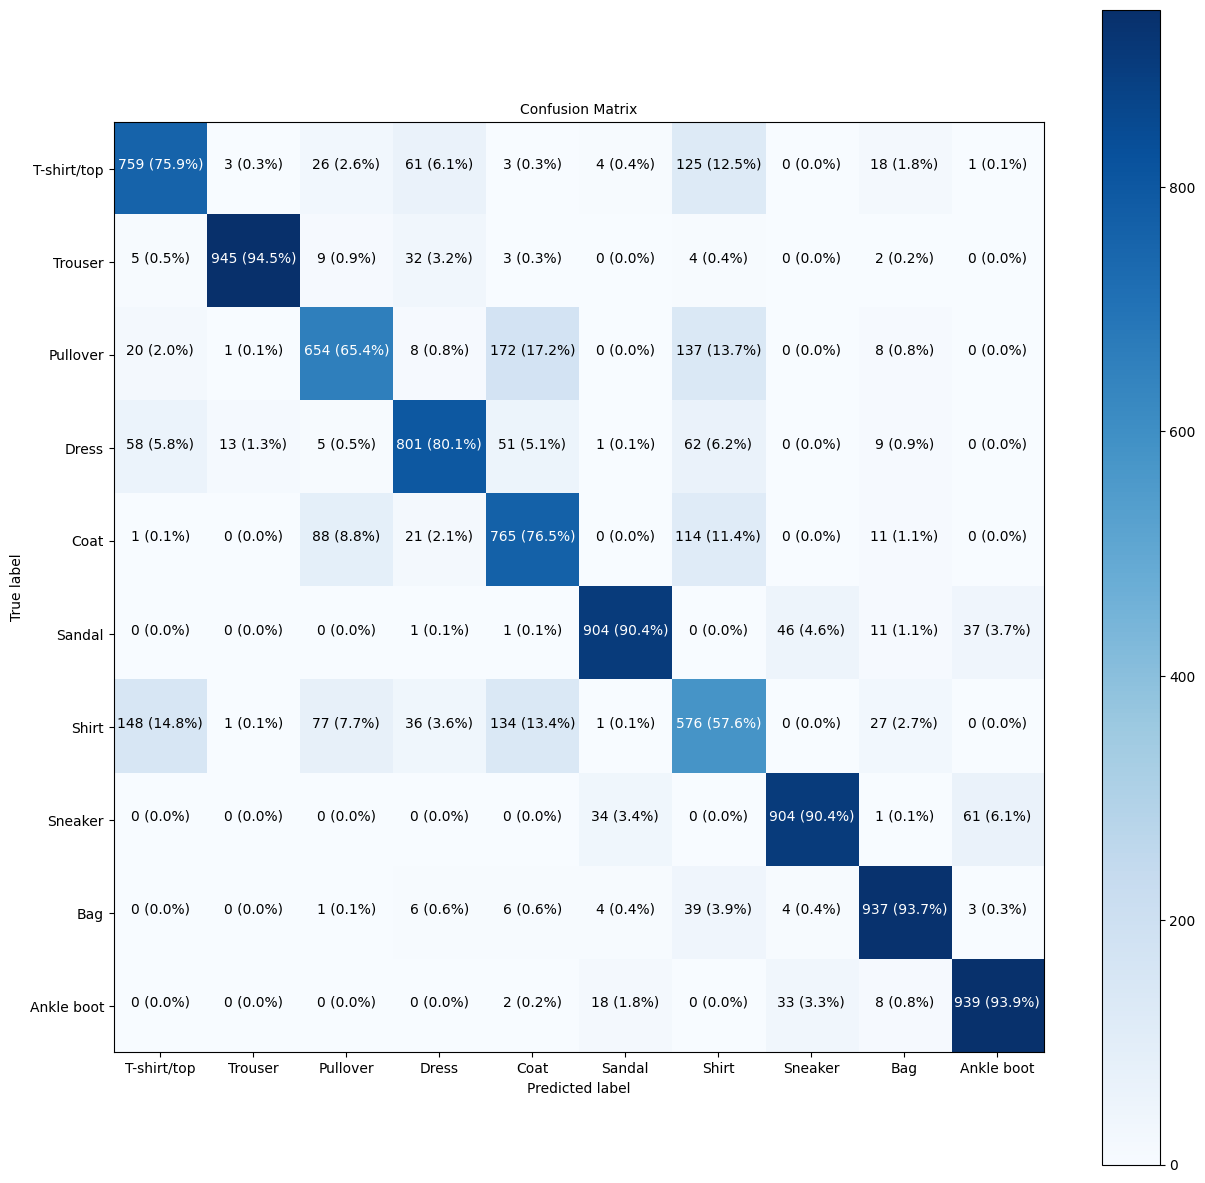

In [196]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the input and output of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [224]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


1/1 [==============================] - 0s 22ms/step


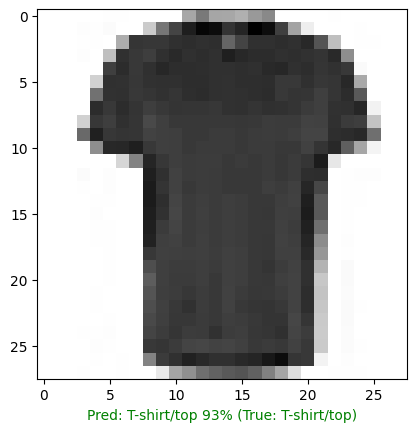

In [226]:
# Check out a random image as well as it's predictions
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on same kind of data your model is trained
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [227]:
# Find the layers of our most recent model
model_14.layers

In [228]:
# Extract a particular layer
model_14.layers[1]

In [229]:
# Get the patterns of layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.06274219,  0.29231942, -0.6847384 ,  0.50296485],
        [-0.37729698, -0.5377344 , -0.5826226 ,  1.2394006 ],
        [ 0.50741816, -1.2421788 , -0.7426096 ,  0.37804216],
        ...,
        [-0.2133329 , -0.3300275 ,  1.3220007 ,  0.18510868],
        [ 0.06980249, -0.23281011,  1.3632666 , -0.00640047],
        [ 0.58023727, -0.34648678, -0.11071485, -0.21824741]],
       dtype=float32),
 (784, 4))

above in weight.shape=(784, 4), 784 is same as 28 X 28 of input and 4 is the number of hidden units of this layer

In [230]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_95 (Dense)            (None, 4)                 3140      
                                                                 
 dense_96 (Dense)            (None, 4)                 20        
                                                                 
 dense_97 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [232]:
# Biase and biases shapes. 4 hidden unit means 4 biases
biases, biases.shape

(array([-0.21419276,  0.4251249 ,  1.0815251 ,  0.8242527 ], dtype=float32),
 (4,))

Every neuron has bias vector. Each of these is paired with weights matrix.weights

The bias vector get initilaized as zeros (at least in the case of Tensorflow Dense layers)

The bias vector dictates how much the pattern within the corresponding weights matrix should influence the next layer

In [233]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_95 (Dense)            (None, 4)                 3140      
                                                                 
 dense_96 (Dense)            (None, 4)                 20        
                                                                 
 dense_97 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


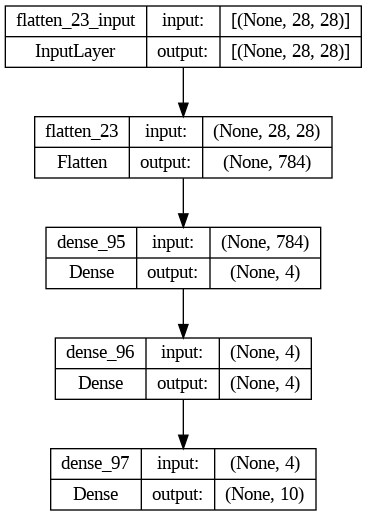

In [234]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...
# must do